# Question 89 - Confidence intervals for a dataset

Given the following [data set](https://docs.google.com/spreadsheets/d/1HQmIjqmr0GYMHCswM-zRPM-R0P_2ck4orn1iBXdoOcA/edit#gid=0) which contains the close price for a given stock, can you plot confidence intervals for the data set? The output should be a plot with the stock price and confidence intervals shown on the same plot. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as spstats

df = pd.read_csv('q089_data.csv', parse_dates=True)
df.head()

,Date,Close
0,1/2/2018,1065.00
1,1/3/2018,1082.48
2,1/4/2018,1086.40
3,1/5/2018,1102.23
4,1/8/2018,1106.94


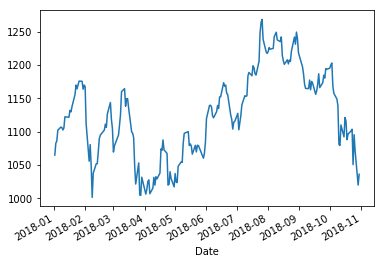

In [2]:
# cleanup
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
df['yyyymm'] = df['Date'].map(lambda x: 100*x.year + x.month) # https://stackoverflow.com/a/25146337
df['month'] = df['Date'].values.astype('datetime64[M]')

# plot
def plot_time_series(df, dt_colname, value_colname):    
    df = df.set_index(dt_colname)
    df[value_colname].plot()

plot_time_series(df, 'Date', 'Close')

In [3]:
def compute_summary(df, value_colname, alpha=.95):
    # for more options, see https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
    sd = df['Close'].std()
    n = len(df)
    mu = df['Close'].mean()
    se = sd/np.sqrt(n)
    tvalue = spstats.t.ppf(alpha, n-1)
    conf_radius = tvalue * se
    return mu, sd, se, n, tvalue, conf_radius

mu, sd, se, n, tvalue, conf_radius = compute_summary(df, 'Close')
print(f"mean={mu}, sd={sd}, se={se}, n={n}")
print(f"error bar radius: {conf_radius}")

mean=1125.963523809523, sd=65.36527116599986, se=4.5106322408730355, n=210
error bar radius: 7.452362886164888


<BarContainer object of 1 artists>

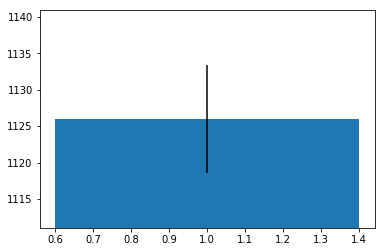

In [4]:
axes = plt.gca()
axes.set_ylim([mu-2*conf_radius,mu+2*conf_radius])
plt.bar(1, mu, yerr=conf_radius)

# plot conf interval for monthly agg

In [5]:
ddf = df.groupby('month').agg({'Close': [np.mean, np.std, "count", spstats.sem]})
ddf.columns = ddf.columns.droplevel(0)
# ddf.reset_index(inplace=True)
ddf

,mean,std,count,sem
month,,,,
2018-01-01,1130.770476,34.460669,21,7.519934
2018-02-01,1088.206842,40.450562,19,9.279995
2018-03-01,1091.490476,49.961829,21,10.902565
2018-04-01,1035.696190,24.316976,21,5.306399
2018-05-01,1069.275909,21.620003,22,4.609400
2018-06-01,1137.626667,19.952855,21,4.354070
2018-07-01,1187.590476,45.577861,21,9.945905
2018-08-01,1225.671739,15.984635,23,3.333027
2018-09-01,1175.808947,12.074479,19,2.770075


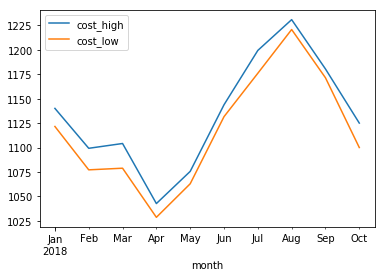

In [6]:
# compute low/hi CI for the monthly agg
alpha = .95
ddf['conf_radius'] = ddf['sem'] + spstats.t.ppf(alpha, ddf['count']-1)
ddf['cost_high'] = ddf['mean'] + ddf['conf_radius']
ddf['cost_low'] = ddf['mean'] - ddf['conf_radius']

ddf[['cost_high','cost_low']].plot()